# Análise da variação do custo do kg do aço

## Introdução

O custos dos insumos da construção civil vêm tendo um aumento expressivo nos últimos anos, por isso identificar quais fatores estão influênciando esse aumento é extremamente importante, uma vez que a engenharia sempre busca a otimização dos custos, isto é, os menores custos. Além disso, a variável de análise é o custo do aço de armação de $\phi = 10 \ mm$ ao longo dos meses.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa:Tratamento dos dados;
* 2ª Etapa: Análises dos dados e conclusões;
* 3ª Etapa: Predição de series temporais.

## Material de análise

O aço estrutural tem como objetivo o combate ao esforço de tração na estrutura de concreto armado. Na figura abaixo pode-se observar uma estrutura de laje onde a armadura de aço está sendo preenchida pelo concreto.

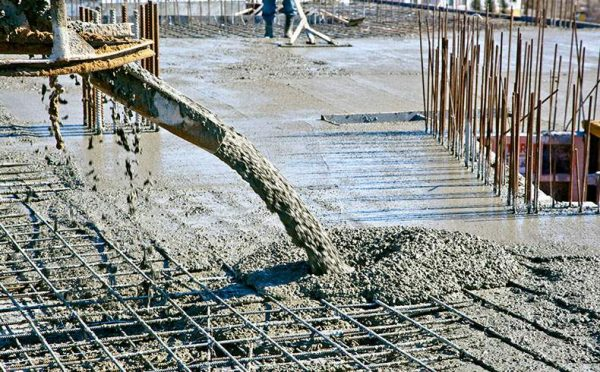

## Objetivos

Os objetivos desta análise são:

* Identificar os períodos críticos, isto é, onde houve um aumento expressivo do custo do aço em um curto período;
* Procurar motivos/respostas para esses aumentos críticos;
* Identificar padrões na série temporal;
* Identificar a região com o maior custo médio;
* Analisar todos os estados de uma região;
* Gerar predições sobre os preços do aço.


## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

* O custo médio/mediano do aço estrutural por estado;
* O dataset informou 21 estados;
* A média do Brasil;
* Dados de fev/2007 até ago/2021.

**FONTE:**
* Sinduscons Estaduais
* A base de dados utilizada neste artigo foi do site a do banco de dados do [CBIC](http://www.cbicdados.com.br/menu/materiais-de-construcao/aco-10mm-e-produtos-de-aco-longo).


**LIMITAÇÕES DA ANÁLISE:**
* Alguns registros de estado estão não foram disponibilizados;

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.






## Importações dos módulos

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_palette('rainbow')
sns.set_context('talk')

## Definindo algumas funções

* Funções para plot

In [73]:
def plotar_lines(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(15, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    plt.grid()
    ax = ax

def plotar_bar(titulo, labelx, labely, x, y, dataset, cor='lightgrey'):
    ax = sns.barplot(x=x, y=y, data=dataset, color=cor)
    ax.figure.set_size_inches(15, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    plt.xticks(rotation=90)
    plt.grid()
    ax = ax

def plotar_normatizado(titulo, labelx, labely, x, y, dataset):
    dataset_normatizado = dataset/dataset.iloc[0]
    ax = sns.lineplot(x=x, y=y, data=dataset_normatizado)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    plt.grid()
    ax = ax
    
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18,loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    plt.grid()
    ax = ax

def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20,rotation=90)
    plt.grid()
    
def correlacao(df):
    ax = plt.figure(figsize=(15,6))
    ax.suptitle('Correlação do custo do kg do aço CA50 $\phi$ = 10 mm ',fontsize=18, x=0.26, y=0.95)
    autocorrelation_plot(df)
    ax = ax
    plt.grid()
    

* Funções para verificação

In [74]:
def tem_nulo(df):
    nulos = df.isnull().sum().sum()
    return f'O data frame tem {nulos} valores nulos'

def erromedio2(series):
    erro = np.power(series, 2).mean()
    return f'O erro médio quadrático foi de {erro:.4f}'

def erro_medicao(previsto, real):
    erro = abs(previsto - real)
    erro_percentual = erro/real
    print(f'O erro percentual entre o valor previsto e o valor real foi de {float(erro_percentual):.2%}')
    return erro_percentual


# 1ª ETAPA: Tratamento dos dados brutos

## Importando o dataset

In [75]:
aco = pd.read_excel('dados/tabela_07.B.01.xlsx')

In [76]:
aco.shape

(187, 40)

In [77]:
aco.head()

,EVOLUÇÃO DO VALOR MÉDIO/MEDIANO DO AÇO1 CA 50A D=10mm - em R$/Kg,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,Unidades da Federação e Média Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANO/MÊS,NaN,UNIDADES DA FEDERAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,AL,AM,BA,CE,DF,ES,GO,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,FEV,2.63,3.13,2.727273,2.69,2.26,2.3,2.61,3.06875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tratando o dataset

* Filtrando o dataset e ajustando algumas colunas

In [78]:
# selecionando o dataset
aco_filtrado = aco.iloc[3:179, 0:24]

# removendo colunas indesejadas
aco_filtrado.drop(
    
    axis=1,
    columns=['EVOLUÇÃO DO VALOR MÉDIO/MEDIANO DO AÇO1 CA 50A D=10mm - em R$/Kg','Unnamed: 1'],
    inplace=True
                 )

# renomeando as colunas
aco_filtrado.columns = aco_filtrado.iloc[0]

* Nomeandos os estados e renomeando a coluna da média

In [79]:
# renomeando o nome das colunas
aco_filtrado.columns.name = 'states_of_brazil'

# renomeando a coluna da média
aco_filtrado.rename(
    
    columns = {'Brasil':'mean_brasil'},
    inplace=True
)

* Ajustando a linha 3 do dataset, o índice e criando a coluna do tempo

In [80]:
aco_filtrado.drop(axis=0, index=3, inplace=True)

In [81]:
aco_filtrado.index = range(aco_filtrado.shape[0])

In [82]:
aco_filtrado['timeline'] = pd.date_range(start='02-2007', end='09-2021', freq='1M')

* Verificando a integridade dos dados

In [83]:
aco_filtrado.dtypes.to_frame()

,0
states_of_brazil,
AL,object
AM,object
BA,object
CE,object
DF,object
ES,object
GO,object
MA,object
MG,object


In [84]:
aco_filtrado.describe()

states_of_brazil,AL,AM,BA,CE,DF,ES,GO,MA,MG,MS,...,PE,PR,RJ,RO,RS,SC,SE,SP,mean_brasil,timeline
count,175.00,175.0,175.00,175.0,175.00,175.00,175.0,175.00,175.0,175.0,...,175.0,175.00,175.00,175.00,175.00,175.00,175.00,175.0,175,175
unique,68.00,91.0,104.00,87.0,109.00,82.00,53.0,85.00,82.0,50.0,...,78.0,95.00,60.00,103.00,116.00,93.00,82.00,95.0,165,175
top,4.19,3.4,4.48,2.9,2.93,2.95,2.9,3.48,3.8,3.7,...,3.4,2.97,3.06,4.35,3.78,4.03,4.31,3.5,...,2021-02-28 00:00:00
freq,27.00,8.0,11.00,8.0,7.00,14.00,24.0,15.00,17.0,40.0,...,9.0,8.00,16.00,10.00,5.00,8.00,10.00,8.0,7,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31 00:00:00


* Verificando a existência de valores nulos

In [85]:
tem_nulo(aco_filtrado)

'O data frame tem 0 valores nulos'

* Exportando a versão limpa do dataframe

In [86]:
aco_filtrado.to_csv('dados/ca50_df.csv', encoding='utf-8', index=False)

# 2ª Etapa: Análise de dados e conclusões

## Importanto os dados

In [87]:
ca50 = pd.read_csv('dados/ca50_df.csv')
ca50.head()

,AL,AM,BA,CE,DF,ES,GO,MA,MG,MS,...,PE,PR,RJ,RO,RS,SC,SE,SP,mean_brasil,timeline
0,2.630,3.13,2.727273,2.69,2.26,2.30,2.61,3.068750,2.39,2.79,...,2.90,2.27,2.33,3.460573,2.91,3.04,2.97,2.49,2.7284093430464402,2007-02-28
1,2.625,3.14,2.681000,2.71,2.39,2.24,2.61,2.923750,2.39,2.85,...,2.90,2.27,2.33,3.460573,2.90,3.08,3.54,2.44,2.7371582607953577,2007-03-31
2,2.630,3.18,2.716643,2.71,2.33,2.25,2.61,2.996000,2.44,2.87,...,2.90,2.30,2.33,3.520000,2.94,3.16,3.31,2.47,2.7667925170068024,2007-04-30
3,2.635,3.22,2.737357,2.72,2.58,2.16,2.63,2.940583,2.51,2.87,...,2.93,2.32,2.33,3.541333,2.98,3.16,3.29,2.47,2.7911558956916096,2007-05-31
4,2.660,3.33,2.729500,2.73,2.49,2.16,2.63,2.960583,2.52,2.85,...,2.93,2.36,2.33,3.603333,2.99,3.16,3.24,2.44,2.7920674603174596,2007-06-30


* Informações sobre o dataframe

In [88]:
ca50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AL           175 non-null    float64
 1   AM           175 non-null    float64
 2   BA           175 non-null    float64
 3   CE           175 non-null    float64
 4   DF           175 non-null    float64
 5   ES           175 non-null    float64
 6   GO           175 non-null    float64
 7   MA           175 non-null    float64
 8   MG           175 non-null    float64
 9   MS           175 non-null    float64
 10  MT           175 non-null    float64
 11  PA           175 non-null    float64
 12  PB           175 non-null    float64
 13  PE           175 non-null    float64
 14  PR           175 non-null    float64
 15  RJ           175 non-null    float64
 16  RO           175 non-null    float64
 17  RS           175 non-null    float64
 18  SC           175 non-null    float64
 19  SE      

* Convertendo a Series do tempo em datetime

In [89]:
ca50['timeline'] = pd.to_datetime(ca50['timeline'])

* Ajustando a coluna no índice

In [90]:
ca50.set_index('timeline', inplace=True)

* Estados analisados

In [91]:
estados = list(ca50.columns)[:-2]
estados

['AL',
 'AM',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PR',
 'RJ',
 'RO',
 'RS',
 'SC',
 'SE']

* Criando as colunas dos meses

In [92]:
# criando a coluna dos meses
ca50['mes'] = ca50.index.month

# criando o dicionário para efetuar a troca
mes = {
    
    1:'Janeiro', 2:'Fevereiro', 3:'Março',
    4:'Abril',   5:'Maio',      6:'Junho',
    7:'Julho',   8:'Agosto',    9:'Setembro',
    10:'Outubro', 11:'Novembro', 12:'Dezembro'
}

# efetuando as trocas dos valores
ca50['mes'] = ca50['mes'].map(mes)

* Adicionando a coluna da média, da velocidade e da acerelação do custo ao longo do tempo.

In [93]:
ca50['mean_brasil'] = ca50.loc[:,'AL':'SP'].mean(axis=1)
ca50['velocidade'] = ca50['mean_brasil'].diff()
ca50['aceleracao'] = ca50['velocidade'].diff()

* Adicionando as colunas móveis de 3 e 7 dias.

In [94]:
# para média
ca50['mean_movel_3d'] = ca50['mean_brasil'].rolling(3).mean()
ca50['mean_movel_7d'] = ca50['mean_brasil'].rolling(7).mean()

# para velocidade
ca50['velocidade_movel_3d'] = ca50['velocidade'].rolling(3).mean()
ca50['velocidade_movel_7d'] = ca50['velocidade'].rolling(7).mean()


# para aceleração
ca50['aceleracao_movel_3d'] = ca50['aceleracao'].rolling(3).mean()
ca50['aceleracao_movel_7d'] = ca50['aceleracao'].rolling(7).mean()

* Verificando o dataframe

## Análise do custo medio/mediano do kg do aço em todo Brasil

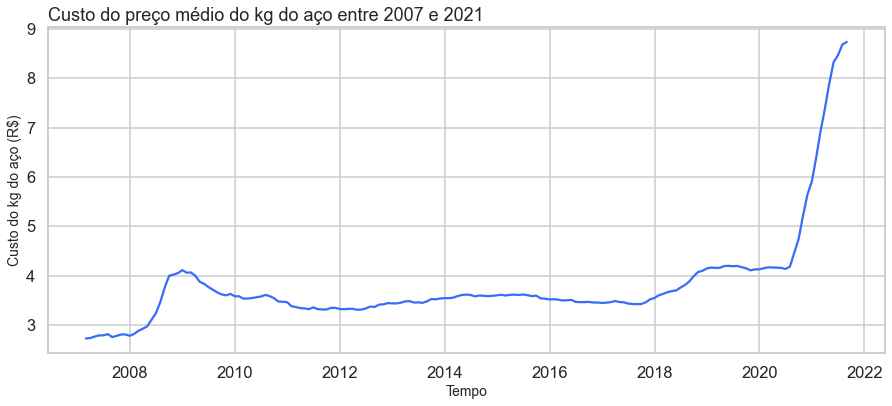

In [95]:
plotar_lines('Custo do preço médio do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['mean_brasil'],
       dataset = ca50)
plt.grid()

* No gráfico acima pode-se observar que existem dois períodos em que o custo do aço obteve um aumento exponencial. O primeiro período encontra-se entre 2009 e 2010 e o segundo período encontra-se entre 2020 e 2021.

> **Primeiro período**:
- Crescimento do PIB;
- Investimento do governo em projetos sociais como ["Minha casa minha vida"](https://economia.uol.com.br/reportagens-especiais/minha-casa-minha-vida-dez-anos/#:~:text=O%20programa%20Minha%20Casa%20Minha,renda%20mensal%20at%C3%A9%20R%24%209.000.);
- Estabilidade ecônomica.
- Incentivo do [governo](https://veja.abril.com.br/economia/em-2009-programas-de-governo-puxaram-avanco-da-construcao-civil/#:~:text=No%20ano%20de%202009%20o,de%202009%2C%20divulgada%20nesta%20semana.) 

> **Segundo período**:
- Retorno da construção após o período de quarentena.


**1ª - Conclusão :** O custo do aço é muito sensível a sua disponibilidade na região, isto é, quando o mercado de construção demanda muito desse produto seu preço cresce muito. Seu preço torna-se um termômetro da construção civil.

* Comparação entre a média, média móvel 3d e média móvel 7d

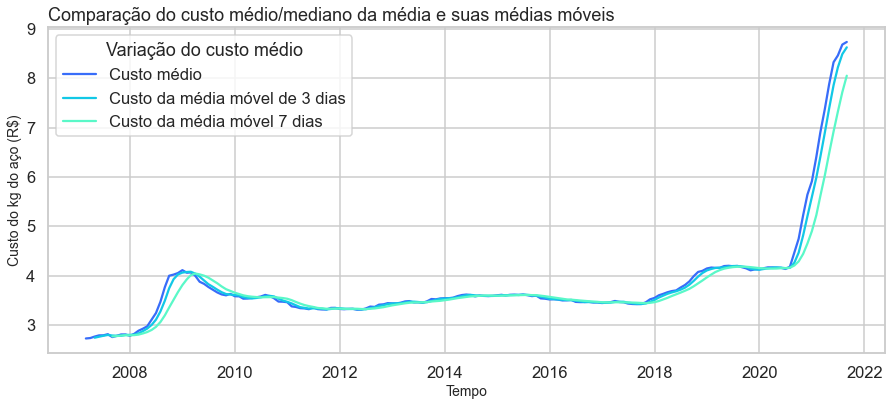

In [96]:
plotar_lines('Custo do preço médio do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['mean_brasil'],
       dataset = ca50)

plotar_lines('Custo do preço médio móvel de 3 dias do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['mean_movel_3d'],
       dataset = ca50)

plotar_lines('Comparação do custo médio/mediano da média e suas médias móveis', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['mean_movel_7d'],
       dataset = ca50)

plt.legend(labels=["Custo médio", "Custo da média móvel de 3 dias", "Custo da média móvel 7 dias"],
           title='Variação do custo médio')
plt.grid()
plt.show()

Assim, pode-se perceber que no ínicio da série temporal existia uma boa correlação, porém após o primeiro pico de crescimento não houve mais uma correlação significativa. Portanto, pode-se concluir que o custo do aço sofre bastante variação, por isso não é possível obter uma boa correlação entre elas.

* Separanda os pontos entre 2008 - 2010

In [97]:
ca50_08_10 = ca50.iloc[8:28,:]

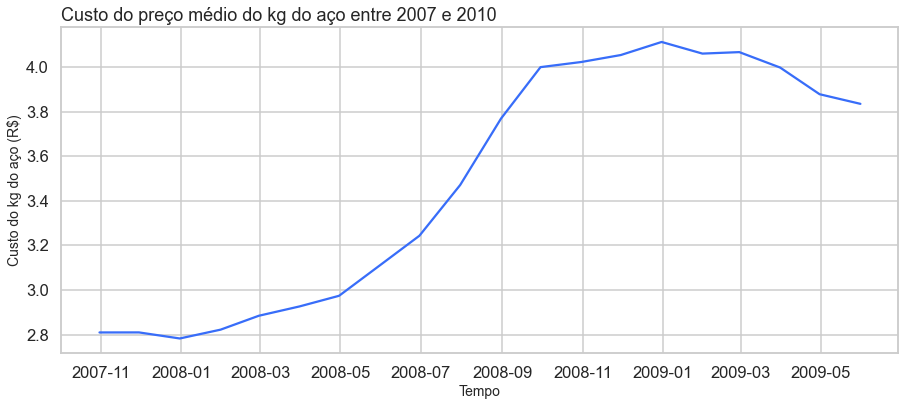

In [98]:
plotar_lines('Custo do preço médio do kg do aço entre 2007 e 2010', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50_08_10.index,
       y = ca50_08_10['mean_brasil'],
       dataset = ca50_08_10)
plt.grid()

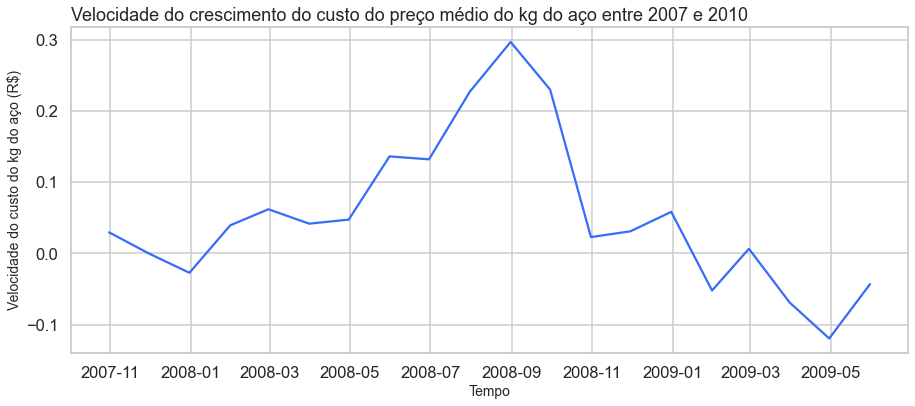

In [99]:
plotar_lines('Velocidade do crescimento do custo do preço médio do kg do aço entre 2007 e 2010', 'Tempo', 'Velocidade do custo do kg do aço (R$)',
       x = ca50_08_10.index,
       y = ca50_08_10['velocidade'],
       dataset = ca50_08_10)
plt.grid()

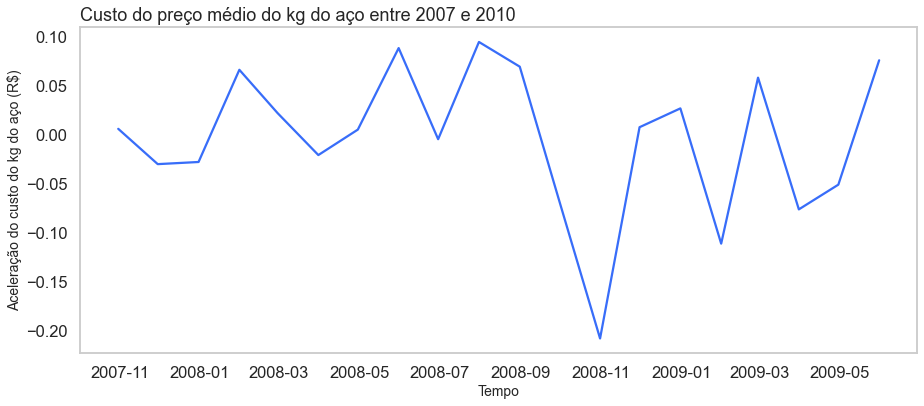

In [100]:
plotar_lines('Custo do preço médio do kg do aço entre 2007 e 2010', 'Tempo', 'Aceleração do custo do kg do aço (R$)',
       x = ca50_08_10.index,
       y = ca50_08_10['aceleracao'],
       dataset = ca50_08_10)

* Analisando o segundo período de crescimento

In [101]:
ca50_20_21 = ca50.iloc[152:,:]

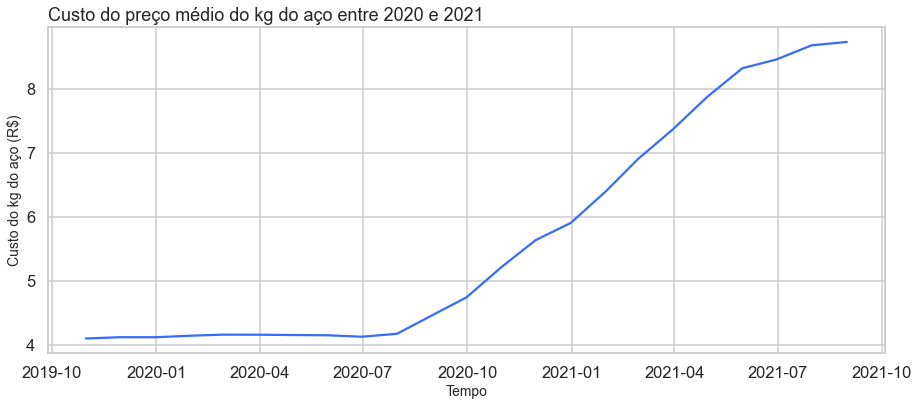

In [102]:
plotar_lines('Custo do preço médio do kg do aço entre 2020 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50_20_21.index,
       y = ca50_20_21['mean_brasil'],
       dataset = ca50_20_21)
plt.grid()

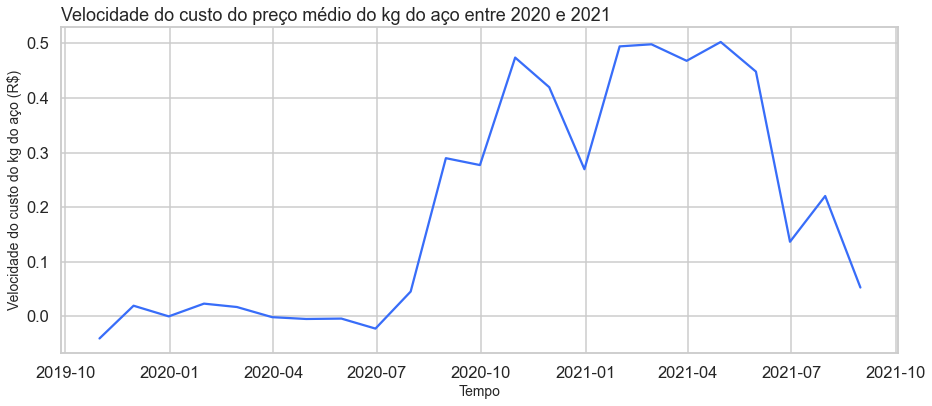

In [103]:
plotar_lines('Velocidade do custo do preço médio do kg do aço entre 2020 e 2021', 'Tempo', 'Velocidade do custo do kg do aço (R$)',
       x = ca50_20_21.index,
       y = ca50_20_21['velocidade'],
       dataset = ca50_20_21)
plt.grid()

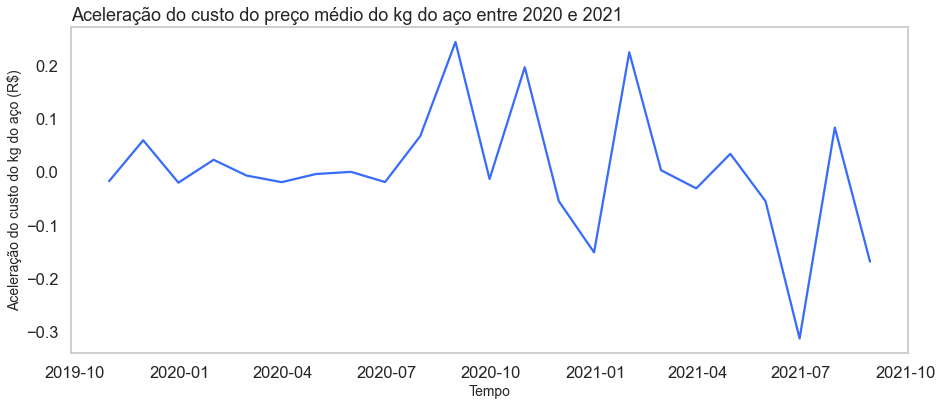

In [104]:
plotar_lines('Aceleração do custo do preço médio do kg do aço entre 2020 e 2021', 'Tempo', 'Aceleração do custo do kg do aço (R$)',
       x = ca50_20_21.index,
       y = ca50_20_21['aceleracao'],
       dataset = ca50_20_21)

* Analisando a velocidade da variação do custo em toda série temporal

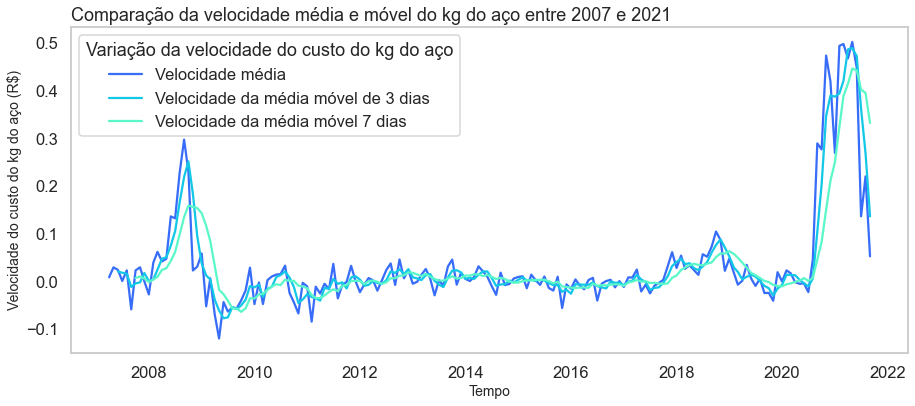

In [105]:
plotar_lines('Custo da velocidade média do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['velocidade'],
       dataset = ca50)

plotar_lines('Custo da velocidade móvel 3d do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['velocidade_movel_3d'],
       dataset = ca50)

plotar_lines('Comparação da velocidade média e móvel do kg do aço entre 2007 e 2021', 'Tempo', 'Velocidade do custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['velocidade_movel_7d'],
       dataset = ca50)

plt.legend(labels=["Velocidade média", "Velocidade da média móvel de 3 dias", "Velocidade da média móvel 7 dias"],
           title='Variação da velocidade do custo do kg do aço')
plt.show()

* Analisando a aceleração média para toda série temporal

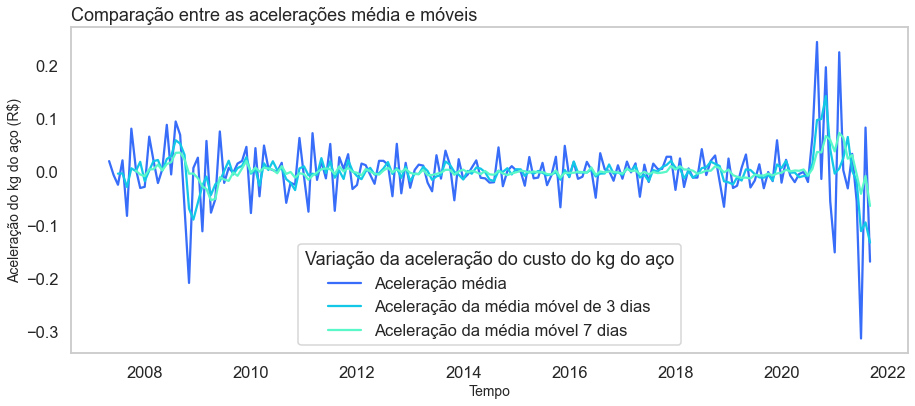

In [106]:
plotar_lines('Custo do preço médio do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['aceleracao'],
       dataset = ca50)

plotar_lines('Custo da aceleração móvel 3d do kg do aço entre 2007 e 2021', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50.index,
       y = ca50['aceleracao_movel_3d'],
       dataset = ca50)

plotar_lines('Comparação entre as acelerações média e móveis', 'Tempo', 'Aceleração do kg do aço (R$)',
       x = ca50.index,
       y = ca50['aceleracao_movel_7d'],
       dataset = ca50)

plt.legend(labels=["Aceleração média", "Aceleração da média móvel de 3 dias", "Aceleração da média móvel 7 dias"],
           title='Variação da aceleração do custo do kg do aço')
plt.show()


* Agrupando os meses e criando a coluna da velocidade e da aceleração

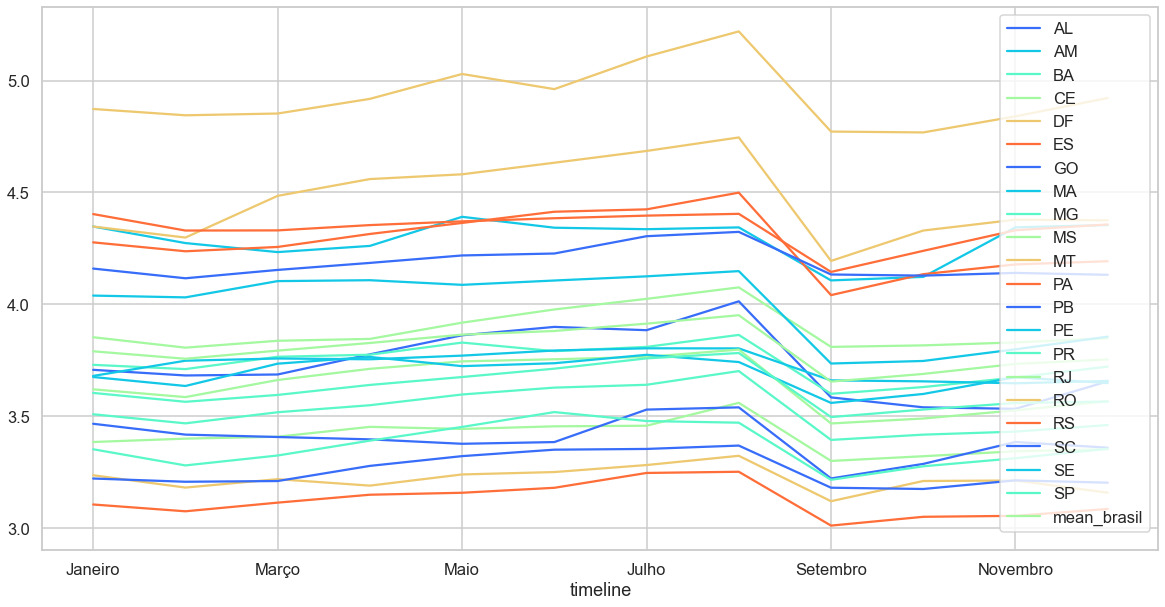

In [107]:
# agrupando o dataframe
ca50_agrupado = ca50.groupby(ca50.index.month).mean()

# renomeando e separando os dados
ca50_agrupado.index = ca50_agrupado.index.map(mes)
ca50_agrupado = ca50_agrupado.loc[:, 'AL':'mean_brasil']

# plotando
ca50_agrupado.plot(figsize=(20, 10))

# criando as colunas da velocidade e da aceleração
ca50_agrupado['velocidade'] = ca50_agrupado['mean_brasil'].diff()
ca50_agrupado['aceleracao'] = ca50_agrupado['velocidade'].diff()

In [108]:
ca50_agrupado.head()

,AL,AM,BA,CE,DF,ES,GO,MA,MG,MS,...,PR,RJ,RO,RS,SC,SE,SP,mean_brasil,velocidade,aceleracao
timeline,,,,,,,,,,,,,,,,,,,,,
Janeiro,3.707500,4.347857,3.729855,3.385000,3.236429,3.105714,3.221786,3.680290,3.508929,3.853214,...,3.352500,3.620357,4.873252,4.277143,4.160000,3.675357,3.604286,3.790315,NaN,NaN
Fevereiro,3.682333,4.274000,3.710779,3.400000,3.181333,3.075333,3.207333,3.748240,3.468333,3.806667,...,3.280333,3.585667,4.845060,4.237333,4.116667,3.635333,3.564667,3.757020,-0.033295,NaN
Março,3.686667,4.233667,3.765931,3.408667,3.218887,3.114000,3.210520,3.758162,3.518000,3.837333,...,3.324667,3.662000,4.852927,4.256667,4.154000,3.735000,3.595333,3.793306,0.036286,0.069582
Abril,3.776667,4.261333,3.775014,3.452667,3.190000,3.149333,3.278200,3.754643,3.549333,3.845667,...,3.391000,3.712000,4.918413,4.314667,4.185333,3.765000,3.640000,3.827543,0.034237,-0.002050
Maio,3.862000,4.391333,3.829299,3.443333,3.240000,3.158133,3.321853,3.770993,3.597333,3.918333,...,3.452333,3.745333,5.029618,4.364000,4.218667,3.724000,3.675333,3.864693,0.037150,0.002913


<AxesSubplot:title={'center':'Custos médios mensais'}, xlabel='timeline'>

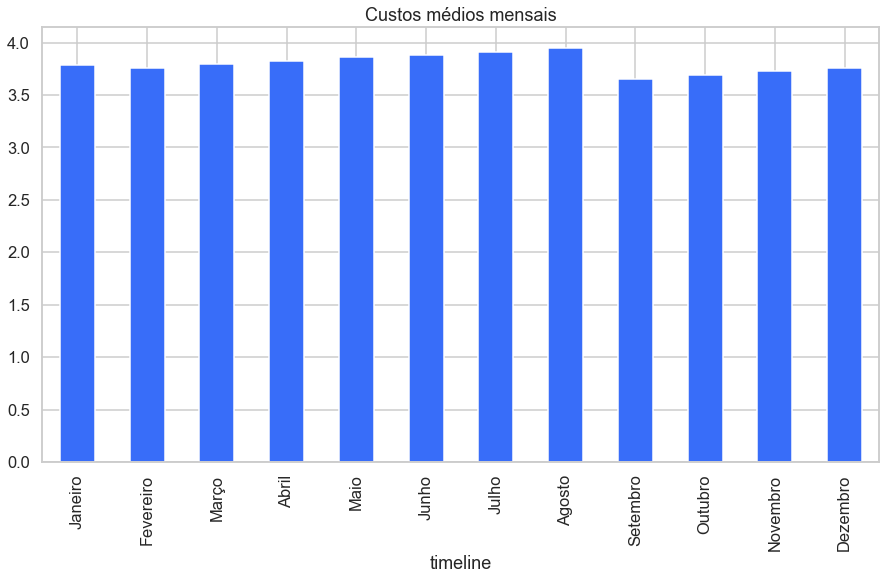

In [109]:
ca50_agrupado.mean_brasil.plot(kind='bar', figsize=(15, 8), title='Custos médios mensais')

Percebe-se um sazonalidade ao longo dos anos, onde o mês de Agosto o preço do aço atinge o seu maior valor.

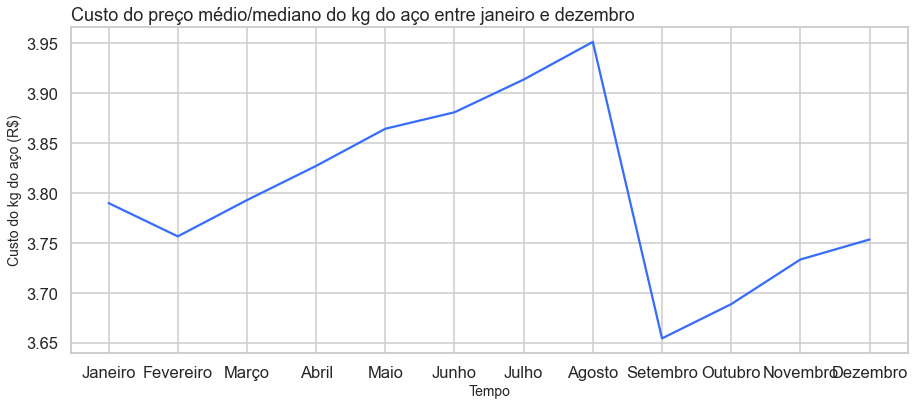

In [110]:
plotar_lines('Custo do preço médio/mediano do kg do aço entre janeiro e dezembro', 'Tempo', 'Custo do kg do aço (R$)',
       x = ca50_agrupado.index,
       y = ca50_agrupado.mean_brasil,
       dataset = ca50_agrupado)
plt.grid()

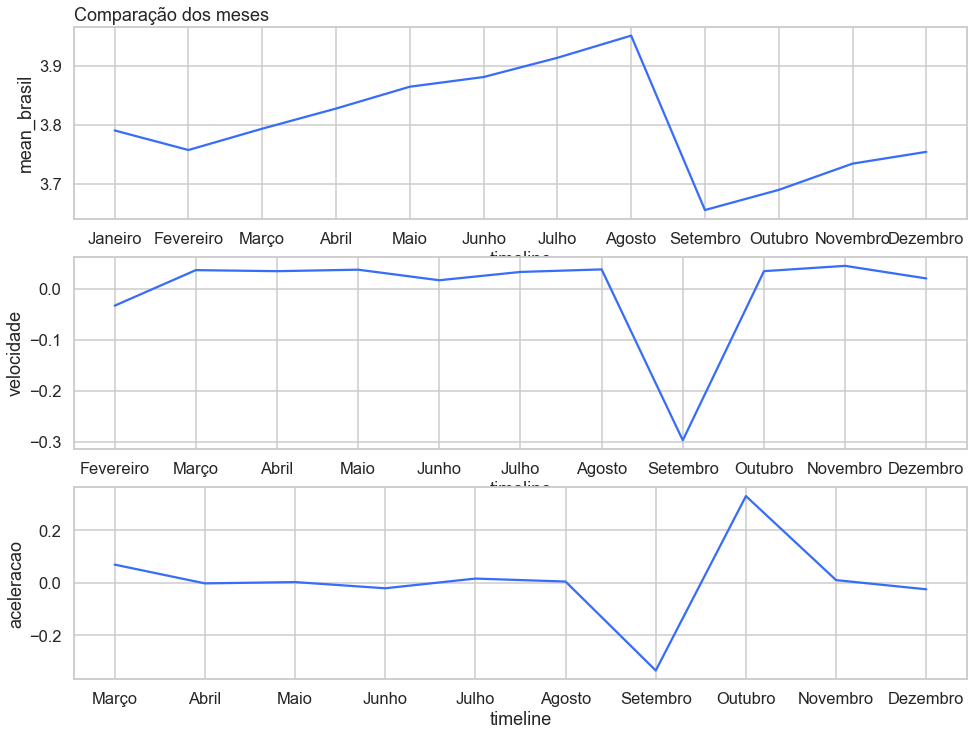

In [111]:
plot_comparacao(ca50_agrupado.index, ca50_agrupado.mean_brasil, ca50_agrupado.velocidade, ca50_agrupado.aceleracao,
                ca50_agrupado, 'Comparação dos meses'
               )
plt.grid()

## Análise do custo por região

In [112]:
regioes = {
           'nordeste':['AL','BA','CE','MA','PB','SE','PB','PE'],
           'norte':['AM','RO','PA'],
           'centro_oeste':['DF','GO','MS','MT'],
           'suldeste':['SP','RJ','ES','MG'],
           'sul':['RS','PR','SC'],
          }


def regiao_df(df, dic, regiao = 'região'):
    regiao_df = df[dic[regiao]]
    return regiao_df


In [113]:
ca50.columns

Index(['AL', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA',
       'PB', 'PE', 'PR', 'RJ', 'RO', 'RS', 'SC', 'SE', 'SP', 'mean_brasil',
       'mes', 'velocidade', 'aceleracao', 'mean_movel_3d', 'mean_movel_7d',
       'velocidade_movel_3d', 'velocidade_movel_7d', 'aceleracao_movel_3d',
       'aceleracao_movel_7d'],
      dtype='object')

* Criando os datasets de cada região

In [114]:
ca50_nordeste = regiao_df(ca50, regioes, 'nordeste')
ca50_norte = regiao_df(ca50, regioes, 'norte')
ca50_centro_oeste = regiao_df(ca50, regioes, 'centro_oeste')
ca50_suldeste = regiao_df(ca50, regioes, 'suldeste')
ca50_sul = regiao_df(ca50, regioes, 'sul')

* Calculando a média de cada região

In [115]:
ca50_nordeste['media_nordeste'] = ca50_nordeste.iloc[:,:].mean(axis=1)
ca50_norte['media_norte'] = ca50_norte.iloc[:,:].mean(axis=1)
ca50_centro_oeste['media_centro_oeste'] = ca50_centro_oeste.iloc[:,:].mean(axis=1)
ca50_suldeste['media_suldeste'] = ca50_suldeste.iloc[:,:].mean(axis=1)
ca50_sul['media_sul'] = ca50_sul.iloc[:,:].mean(axis=1)

* Criando um dataset com as médias da região

In [116]:
ca50_media_regiao = pd.DataFrame()
ca50_media_regiao['nordeste'] = ca50_nordeste['media_nordeste']
ca50_media_regiao['norte'] = ca50_norte['media_norte']
ca50_media_regiao['centro_oeste'] = ca50_centro_oeste['media_centro_oeste']
ca50_media_regiao['suldeste'] = ca50_suldeste['media_suldeste']
ca50_media_regiao['sul'] = ca50_sul['media_sul']

Text(0, 0.5, 'Custo médio do kg do aço por região')

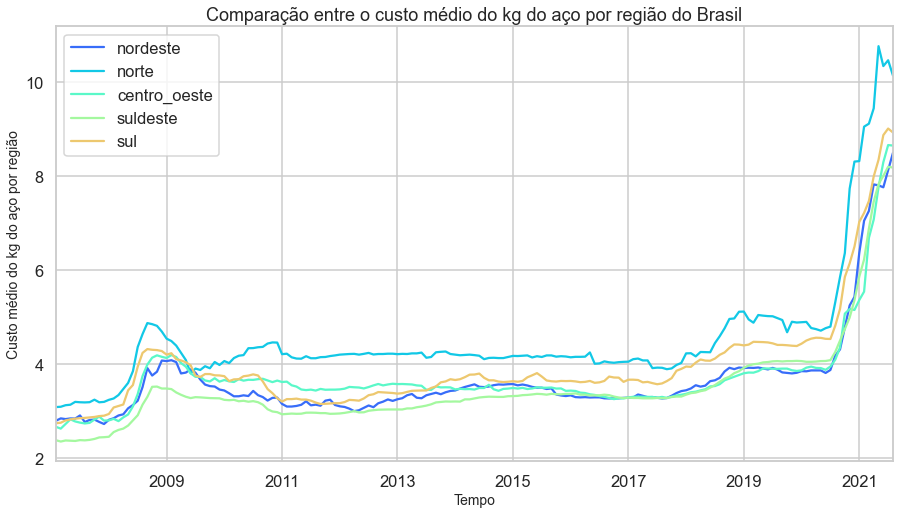

In [117]:
ca50_media_regiao.plot(figsize=(15, 8))
plt.title("Comparação entre o custo médio do kg do aço por região do Brasil", fontsize=18)
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Custo médio do kg do aço por região", fontsize=14)

* Assim, de acordo com o gráfico acima pode-se concluir que a região com o maior custo médio é a Norte. Vale salientar que, a região Norte tem no total sete estados, porém na análise levada apenas em conta os estados disponibilizados, isto é, apenas três estados. Por isso, o valor médio dessa região possa ter ficado comprometida.

## Análise da região Centro-Oeste

Por fim, foi-se pedido a anáçose de uma região.

Objetivos da análise da região:

* Identificar qual/quais estão estão com um custo médio acima da  média da região;

<AxesSubplot:xlabel='timeline'>

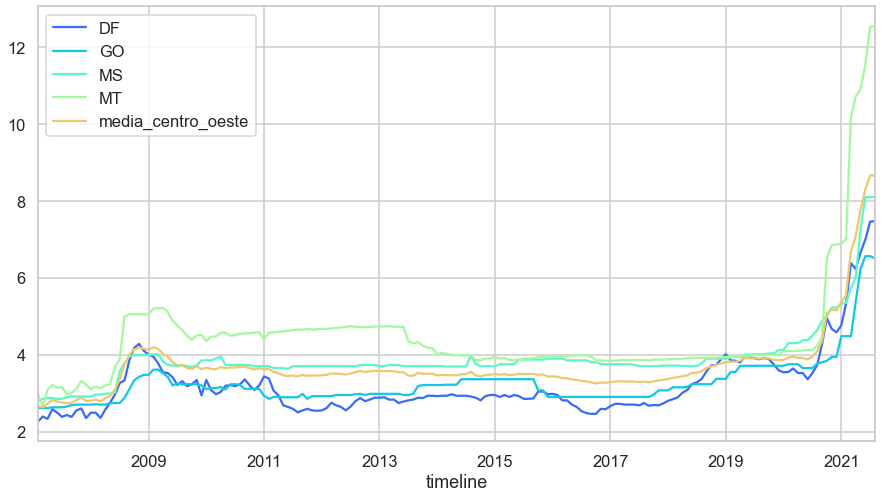

In [118]:
ca50_centro_oeste.plot(figsize=(15, 8))

Os estados de Mato Grosso e Mato Grosso do Sul obtiveram os maiores custos médias em relação à média da região.


## Conclusões encontradas.

<hr>

**PERGUNTA:** Identificar os perídos críticos, isto é, onde houve um aumento expressivo do custo do aço em um curto período de tempo.

**RESPOSTA:** Na análise da série temporal foram identificados dois períodos (2009-2011 e 2019-2021) de grande crescimento no custo do aço.

<hr>

**PERGUNTA:** Procurar motivos/respostas para esses aumentos críticos;

**RESPOSTA:** Para o primeiro período de análise foi possível identificar grandes incentivos fiscais do governo com projetos sociais que fomentaram o crescimento da construção civil. Já no segundo período pode-se relacionar com a retomada das obras de concreto armado, pois devido a pandemia de COVID-19, em muitos estados do Brasil, as obras estavam restritas e paradas.

<hr>

**PERGUNTA:** Identificar padrões na série temporal;

**RESPOSTA:** Com a análise média de todos os meses foi possível identificar uma sazonalidade entre os meses dos anos, no qual os meses de Julho, Agosto e Setembro houve um aumento no custo do aço em todas as regiões analisadas.

<hr>

**PERGUNTA:** Identificar a região com o maior custo médio;

**RESPOSTA:** A região que apresentou o maior custo médio foi a região Norte.

<hr>

**PERGUNTA:** Analisar todos os estados de uma região;

**RESPOSTA:** A região escolhidam foi a região Centro-Oeste. Assim, nos estados de Mato Grosso e Mato Grosso do Sul obtiveram os maiores custos médias em relação à média da região.

<hr>

# 3ª Etapa: Análise preditiva

In [119]:
sns.set_style("whitegrid")
sns.set_palette('rainbow')
sns.set_context('talk')

* Criando o dataframe padrão


In [120]:
predict_df = pd.DataFrame(ca50['mean_brasil'], index = ca50.index)
predict_df.head()

,mean_brasil
timeline,
2007-02-28,2.728409
2007-03-31,2.737158
2007-04-30,2.766793
2007-05-31,2.791156
2007-06-30,2.792067


**ANALISANDO A SERIE TEMPORAL**

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [122]:
resultados = seasonal_decompose(predict_df, freq = 12)

In [123]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

Text(0.5, 1.0, 'Observando os valores reais, tendência e sazonalidade')

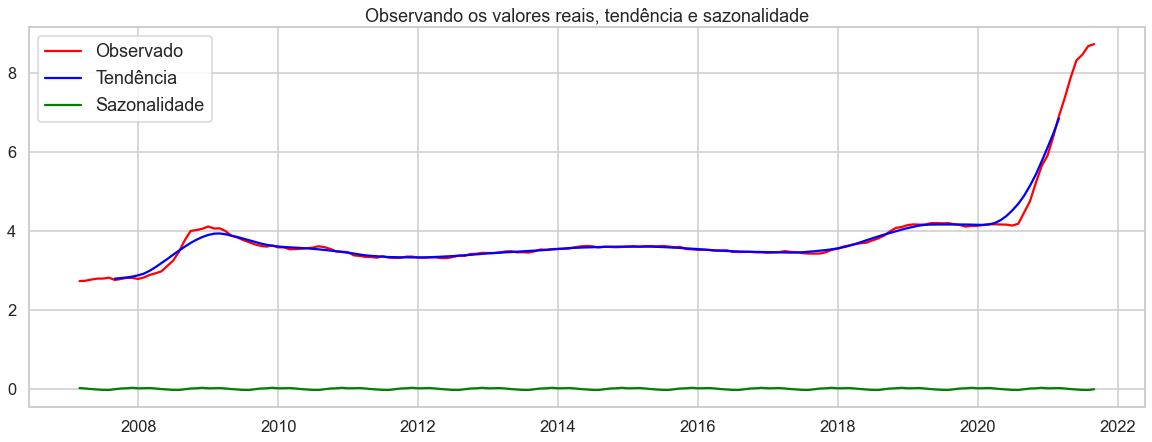

In [124]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')
plt.title("Observando os valores reais, tendência e sazonalidade", fontsize=18)

Text(0.5, 1.0, 'Sazonalidade')

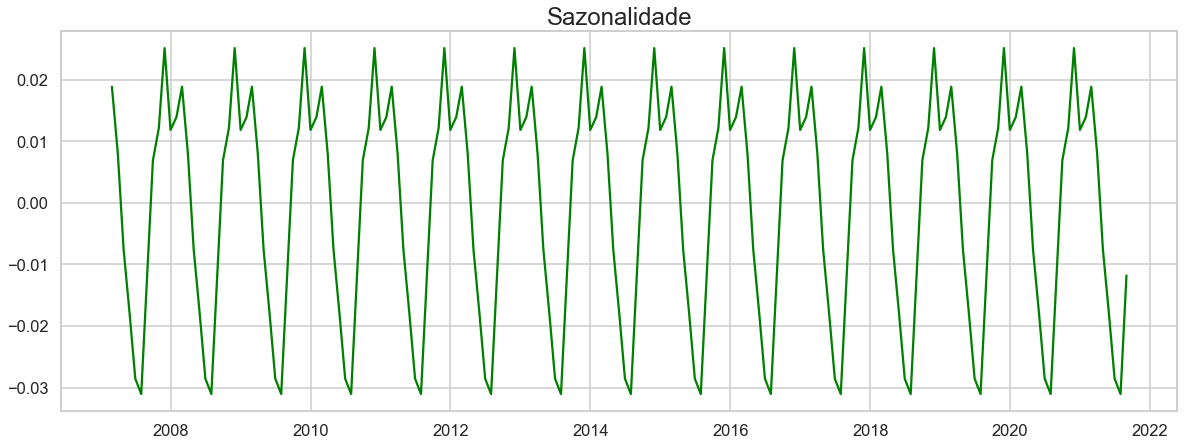

In [125]:
plt.figure(figsize=(20, 7))
plt.plot(resultados.seasonal, color='green')
plt.title('Sazonalidade', fontsize=(24))

**VERIFICAÇÃO DE ESTACIONARIDADE**

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [126]:
from statsmodels.tsa.stattools import adfuller
round(adfuller(predict_df.mean_brasil)[1], 4)

0.9901

**AUTOCORRELAÇÃO TOTAL E PARCIAL**

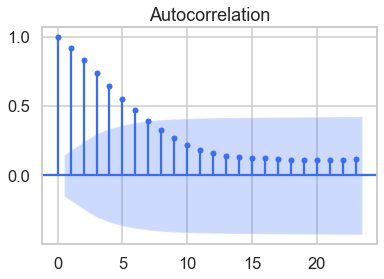

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(predict_df['mean_brasil'])
plt.show()

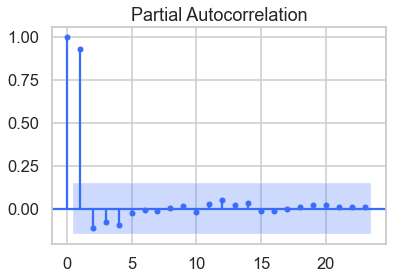

In [128]:
plot_pacf(predict_df.mean_brasil)
plt.show()

In [129]:
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(15, 18))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

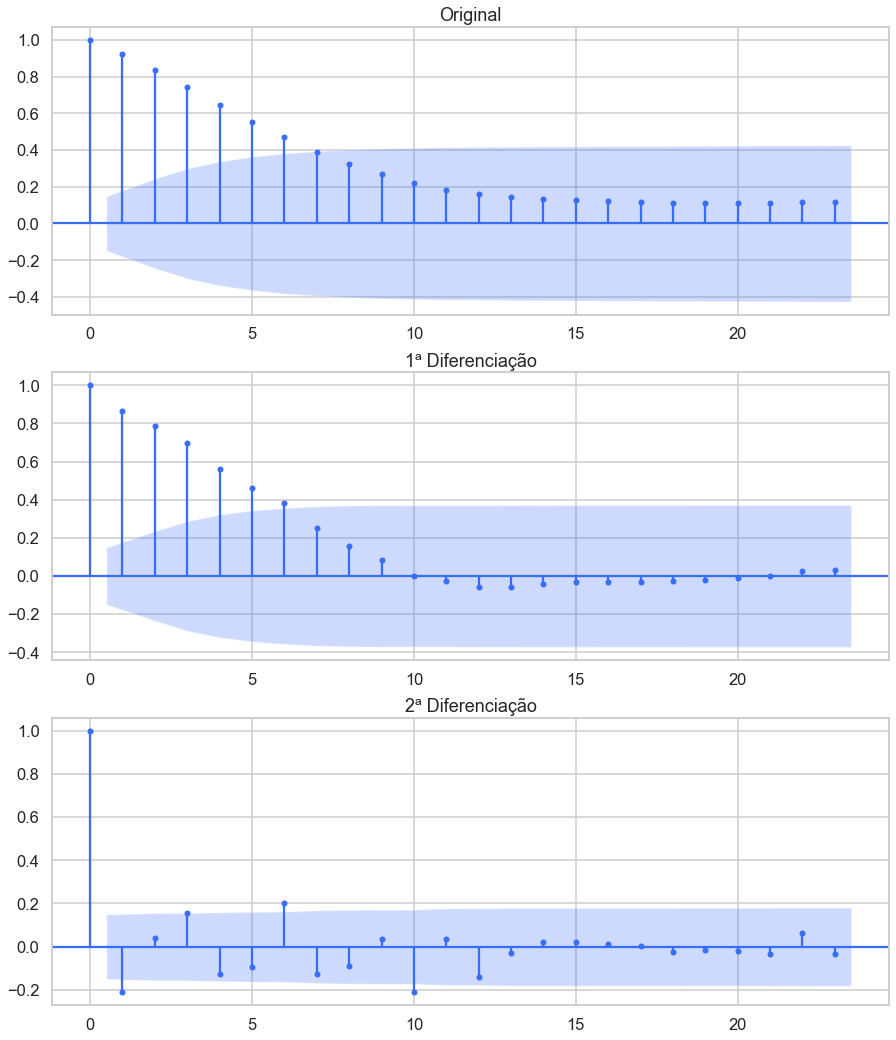

In [130]:
plotarACF(predict_df.mean_brasil, predict_df.mean_brasil.diff().dropna(), predict_df.mean_brasil.diff().diff().dropna() )

**CONCLUSÕES SOBRE AS AUTOCORRELAÇÕES**

### Modelos preditivos

As previsões de séries temporais é, usualmente, modelada sob um processo estocástico $Y(t)$, por exemplo, uma sequência de variáveis aleatórias. Em uma previsão, estamos no momento $t$ e temos o interesse de estimar o $Y(t+1)$, usando somentes as informações disponíveis até o instante $t$.

### Modelo de Naive

Essa é a predição mais simples e, por isso, foi utilizada como base para a comparação com as outras.

In [131]:
predict_naive = predict_df.copy()
predict_naive['naive'] = predict_naive.shift(1)
predict_naive.head()

,mean_brasil,naive
timeline,,
2007-02-28,2.728409,NaN
2007-03-31,2.737158,2.728409
2007-04-30,2.766793,2.737158
2007-05-31,2.791156,2.766793
2007-06-30,2.792067,2.791156


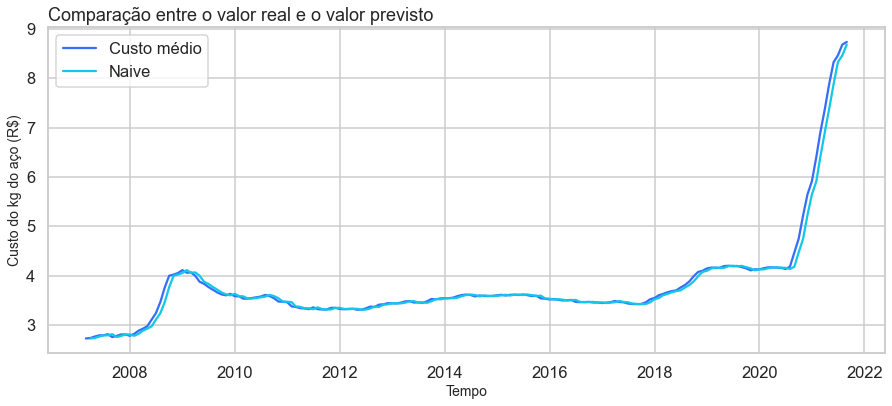

In [132]:
plotar_lines('Custo do preço médio/mediano do kg do aço entre janeiro e dezembro', 'Tempo', 'Custo do kg do aço (R$)',
       x = predict_naive.index,
       y = predict_naive.mean_brasil,
       dataset = predict_naive)

plotar_lines('Comparação entre o valor real e o valor previsto', 'Tempo', 'Custo do kg do aço (R$)',
       x = predict_naive.index,
       y = predict_naive['naive'],
       dataset = predict_naive)

# legendas
plt.legend(labels=["Custo médio", "Naive"])
plt.show()

**VALIDAÇÃO**

Faremos a validação do módelo calculando o erro médio quadrático entre as previsões e os valores observados.

In [133]:
erromedio2(predict_naive['mean_brasil'] - predict_naive['naive'])

'O erro médio quadrático foi de 0.0130'

O método de Naive tem um $R^{2}$ é igual à 0.0130

### Modelo AutoRegressivo (AR)

Em modelos de regressão múltipla, fazemos a previsão da variável de interesse utilizando a combinação linear das variáveis preditoras. Em um modelo autoregressivo, fazemos a previsão da variável de interesse utilizando a combinação linear dos valores passados da mesma variável. O termo autoregressivo indica que o processo é definido como um modelo de regressão de uma variável por ela mesma.


Assim, um modelo autoregressivo de ordem $p$ pode ser escrito como

$$y_t = c + \beta_1y_{t-1} + \beta_2y_{t-2} + \cdots + \beta_p y_{t - p} + \epsilon_t$$

onde $\epsilon_t$ é o ruído branco. Nos referimos a um modelo AR($p$) como um modelo autoregressivo de ordem $p$.

https://www.statsmodels.org/v0.12.2/generated/statsmodels.tsa.ar_model.AR.html

* Para p=1

In [134]:
from statsmodels.tsa.ar_model import AutoReg
predict_linear = predict_df.copy()

In [135]:
configs = 5
best = 10000
for config in range(configs):
    config = config + 1
    try:
        ar = AutoReg(predict_linear['mean_brasil'], lags=(config)).fit()
        erro = (ar.resid ** 2).mean()
        if erro < best:
            print(f'Modelo (AR{config}), erro={erro:.5f}')
            best = erro
    except:
        print(f'{config} inválida')
        pass

Modelo (AR1), erro=0.00755
Modelo (AR2), erro=0.00297
Modelo (AR3), erro=0.00287
Modelo (AR5), erro=0.00275


In [136]:
ar_3 = AutoReg(predict_linear['mean_brasil'], lags=3).fit()
(ar.resid ** 2).mean()

0.0027501606624738455

In [137]:
ar_3 = AutoReg(predict_linear['mean_brasil'], lags=4).fit()
(ar.resid ** 2).mean()


0.0027501606624738455

**PREVENDO VALORES COM O MODELO AUTO REGRESSIVO**

In [138]:
predict_linear.mean_brasil.tail()

timeline
2021-04-30    7.875238
2021-05-31    8.323571
2021-06-30    8.460238
2021-07-31    8.680714
2021-08-31    8.733571
Name: mean_brasil, dtype: float64

In [139]:
valor_previsto_setembro_ar = ar_3.predict(start='2021-09-30', end='2021-09-30')
round(valor_previsto_setembro_ar, 3)

2021-09-30    8.759
Freq: M, dtype: float64

Assim, pode-se prever o valor do custo do aço do mês de setembro de 2021. Vale ressaltar que, quando aumenta-se a distância temporal, a precisão diminui expodencialmente.

* O valor previsto no mês de Setembro foi de 8.766 R$/kg;

* O valor real foi de 8.619 R$/kg (valor referente à tabela_07.B.01_91.xlsx).

In [140]:
valor_real_setembro = 8.619

* Calculando o erro percentual

In [141]:
erro_percentual = erro_medicao(valor_previsto_setembro_ar, valor_real_setembro)

O erro percentual entre o valor previsto e o valor real foi de 1.63%


## Modelo Auto-Regressivo de Médias Móveis (ARMA)

O modelo ARMA é a junção dos modelos $AR(p)$ e $MA(q)$:

* $AR(p)$: tenta explicar o efeito de momentum da série.
* $MA(q)$: tenta capturar o efeito do ruído na série. Esse efeito pode ser interpretado como eventos inesperados que afetam a observação.

O modelo criado é representado pela equação:

${\displaystyle X_{t}=c+\varepsilon _{t}+\sum _{i=1}^{p}\beta _{i}X_{t-i}+\sum _{i=1}^{q}\theta _{i}\varepsilon _{t-i}.}$

A descoberta dos valores apropriados de ${\displaystyle p}$ e ${\displaystyle q}$ no modelo $ARMA({\displaystyle p,q})$ pode ser facilitada ao mapear as funções de autocorrelação parcial para um valor estimado de ${\displaystyle p}$ e, da mesma forma, usar as funções de autocorrelação para um valor estimado de ${\displaystyle q}$. Mais informações podem ser obtidas considerando as mesmas funções para os resíduos de um modelo ajustado com uma seleção inicial de ${\displaystyle p}$ e ${\displaystyle q}$.

In [144]:
from statsmodels.tsa.arima.model import ARIMA
predict_arma = predict_df.copy()

In [145]:
configs = [(1,0, 1), (1, 0, 2), (2, 0, 1), (2, 0, 2), (3, 0, 1), (3, 0, 2), (3, 0, 3)]
best = 10000
for config in configs:
    try:
        arma_ii = ARIMA(predict_arma.mean_brasil, order=config).fit()
        erro = (arma_ii.resid ** 2).mean()
        if erro < best:
            print(f'ARMA{config}, erro={erro}')
            best = erro
    except:
        print(f'{config} inválida')
        pass

ARMA(1, 0, 1), erro=0.054690936103094785
ARMA(1, 0, 2), erro=0.047687637428796906
ARMA(2, 0, 1), erro=0.011182700388673293
ARMA(2, 0, 2), erro=0.010788401362149085


**PREVENDO VALORES COM O ARMA**

In [149]:
arma = ARIMA(predict_arma.mean_brasil, order=(2, 0, 2)).fit()

In [151]:
valor_previsto_setembro_arma = arma.predict(start='2021-09-30', end='2021-09-30')
round(valor_previsto_setembro_arma, 3)
erro_percentual = erro_medicao(valor_previsto_setembro_arma, valor_real_setembro)

O erro percentual entre o valor previsto e o valor real foi de 1.61%


## Modelo Integrado Auto-regressivo de Média Móveis (ARIMA)
ARIMA é a acrônimo que significa "Autoregressive Integrated Moving Average Model" (Modelo de médias móveis integrado de auto regressivo).

Esse acrônimo é descritivo, capturando os aspectos chave do próprio modelo. Resumidamente, estes são:

* AR: Auto regressão. Um modelo que utiliza a relação de dependência entre uma observação e um conjunto de observações passadas.
* I: Integrated. O uso de diferenças das obervações para tornar uma série estacionária.
* MA: Média móvel. Um modelo que usa a dependência entre uma observação e o erro residual das média móveis aplicadas em observações anteriores. 

Cada um desses componentes são explicitamente especificados no modelo através de parâmetros. Uma notação padrão é utilizada como ARIMA($p, d, q$), onde os parâmetros são substituidos por valores inteiros para indicar o modelo ARIMA específico que está sendo utilizado. 

Os parâmetros do modelo ARIMA são definidos como:

* p: o número de observações passadas inclusas no modelo, também chamado de "ordem do lag".
* d: o número de diferenças tomadas, também chamado de "grau de diferenciação"
* q: o tamanho da janela da média móvel, também chamado de "ordem da média móvel"

In [152]:
from statsmodels.tsa.arima.model import ARIMA

orders = [(2, 1, 1), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
best = 10000
for order in orders:
    try:
        arima = ARIMA(predict_arma.mean_brasil, order=order).fit()
        erro = (arima.resid ** 2).mean()
        if erro < best:
            print(f'ARIMA{order}, erro={erro}')
            best = erro
    except:
        pass

ARIMA(2, 1, 1), erro=0.04542462327624348
ARIMA(3, 1, 2), erro=0.04518510353760956
ARIMA(3, 1, 3), erro=0.04516631482089173


In [153]:
arima_313 = ARIMA(predict_arma.mean_brasil, order=(3, 1, 3)).fit() 

In [154]:
valor_previsto_setembro_arima = arima_313.predict(start='2021-09-30', end='2021-09-30')
round(valor_previsto_setembro_arima, 3)
erro_percentual = erro_medicao(valor_previsto_setembro_arima, valor_real_setembro)

O erro percentual entre o valor previsto e o valor real foi de 1.37%


## Conclusões sobre os modelos preditivos